In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import copy
import math

from sklearn.model_selection import train_test_split
from hmmlearn import hmm

np.random.seed(46)

In [12]:
# sample sequences parameters
sequenceLen = 100 # e.g. O = [1, 2, 3] => sampleLen = 3
nSequencesTrain = 50 # only use normal samples for training
nSequencesNormalTest = 50
nSequencesAnomalyTest = 50

# synthetic parameters
peakMean = 10
peakSD = 1 # SD := standard deviation
noBeatPos = 0 # the position when the heart does not beat
period = 20
positivePeakID = 1
negativePeakID = 3

In [3]:
# generate the training set
dataTrain = np.array([])
dataTrainLen = np.zeros((nSequencesTrain,), dtype = 'int')
for i in range(nSequencesTrain):
    peak = np.random.normal(loc = peakMean, scale = peakSD,
                            size = 1)
    for j in range(sequenceLen):
        if j % period == positivePeakID:
            observation = peak
        elif j % period == negativePeakID:
            observation = - peak
        else:
            observation = noBeatPos
        dataTrain = np.append(dataTrain, observation)
    dataTrainLen[i] = int(sequenceLen)

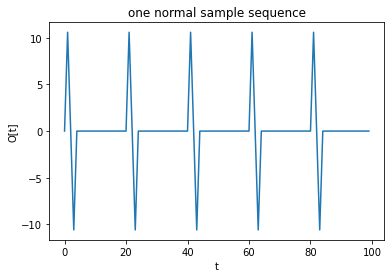

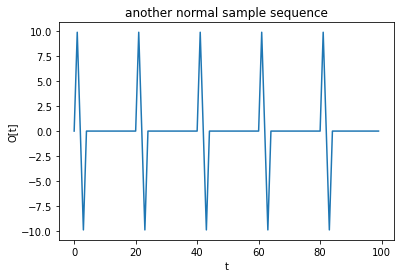

In [4]:
# training (normal) set demo
plt.plot(dataTrain[0 : sequenceLen])
plt.title('one normal sample sequence')
plt.xlabel('t')
plt.ylabel('O[t]')
plt.show()
plt.plot(dataTrain[8 * sequenceLen : 9 * sequenceLen])
plt.title('another normal sample sequence')
plt.xlabel('t')
plt.ylabel('O[t]')
plt.show()

In [36]:
# generate the normal testing set
normalTest = np.array([])
normalTestLen = np.zeros((nSequencesNormalTest,), dtype = 'int')
for i in range(nSequencesNormalTest):
    peak = np.random.normal(loc = peakMean, scale = peakSD, size = 1)
    for j in range(sequenceLen):
        if j % period == positivePeakID:
            observation = peak
        elif j % period == negativePeakID:
            observation = - peak
        else:
            observation = noBeatPos
        normalTest = np.append(normalTest, observation)
    normalTestLen[i] = int(sequenceLen)
        
# generate one anomaly testing set
# this anomaly set sometimes has a different period
anomalyTest = np.array([])
anomalyTestLen = np.zeros((nSequencesAnomalyTest,), dtype = 'int')
nAnomaly = 1 # number of times that the heart suddenly jumps
magicCnt = 3
positiveMagicID = 6
negativeMagicID = 8
for i in range(nSequencesAnomalyTest):
    peak = np.random.normal(loc = peakMean, scale = peakSD, size = 1)
    magicCnt = 3
    for j in range(sequenceLen):
        if j % period == positivePeakID: # normal beat
            observation = peak
            magicCnt = magicCnt - 1
        elif j % period == negativePeakID: # normal beat
            observation = - peak
        else:
            if magicCnt <= 0 and magicCnt > - nAnomaly:
                # magic influences the patient's heart!
                if j % period == positiveMagicID:
                    observation = peak
                elif j % period == negativeMagicID:
                    observation = - peak
                else:
                    observation = 0
            else:
                # beats normally
                observation = 0
        anomalyTest = np.append(anomalyTest, observation)
    anomalyTestLen[i] = int(sequenceLen)

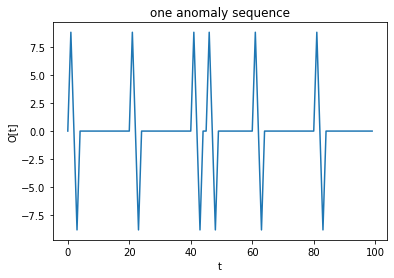

In [14]:
# anomaly set demo
plt.plot(anomalyTest[0 : sequenceLen])
plt.title('one anomaly sequence')
plt.xlabel('t')
plt.ylabel('O[t]')
plt.show()

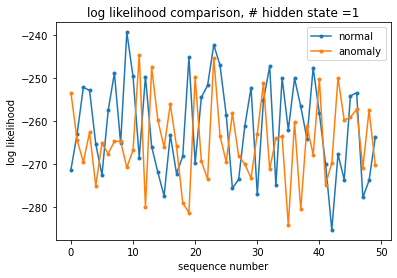

In [22]:
# define the model and initialize

# model parameters
nComponents = 1
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

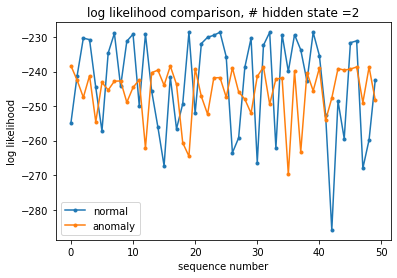

In [23]:
# hidden state # = 2

# model parameters
nComponents = 2
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

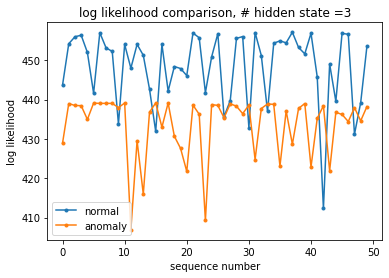

In [29]:
# hidden state # = 3

# model parameters
nComponents = 3
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

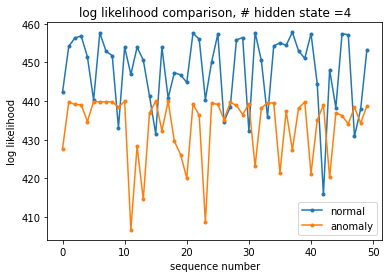

In [25]:
# hidden state # = 4

# model parameters
nComponents = 4
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

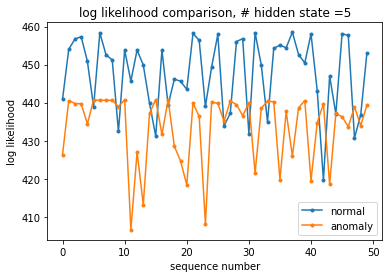

In [28]:
# hidden state # = 5

# model parameters
nComponents = 5
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

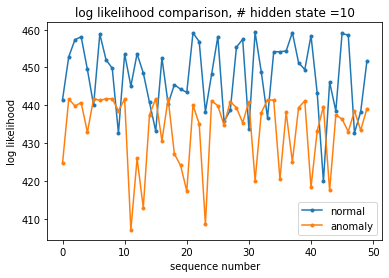

In [27]:
# hidden state # = 10

# model parameters
nComponents = 10
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the anomaly test set
scoreAnomaly = np.empty((nSequencesAnomalyTest, ))
for i in range(nSequencesAnomalyTest):
    dataScore = anomalyTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreAnomaly[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreAnomaly, ".-", label = 'anomaly')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

In [33]:
print('transmat')
print(model.transmat_)
print('pi')
print(model.startprob_)
print('mean')
print(model.means_)
print("covar")
print(model.covars_)

transmat
[[8.87640449e-001 5.61797753e-002 5.61797753e-002]
 [1.00000000e+000 2.25406452e-092 8.11671941e-154]
 [1.00000000e+000 4.62373843e-091 5.18567573e-092]]
pi
[1.00000000e+000 2.31727059e-182 1.54189448e-180]
mean
[[ 0.        ]
 [ 9.91219655]
 [-9.91219655]]
covar
[[[2.22222222e-06]]

 [[7.40189218e-01]]

 [[7.40189218e-01]]]


In [37]:
# generate the special testing set
specTest = np.array([])
specTestLen = np.zeros((nSequencesNormalTest,), dtype = 'int')
for i in range(nSequencesNormalTest):
    peak = np.random.normal(loc = peakMean, scale = peakSD, size = 1)
    for j in range(sequenceLen):
        if j % period == positivePeakID:
            observation = - peak
        elif j % period == negativePeakID:
            observation = peak
        else:
            observation = noBeatPos
        specTest = np.append(specTest, observation)
    specTestLen[i] = int(sequenceLen)

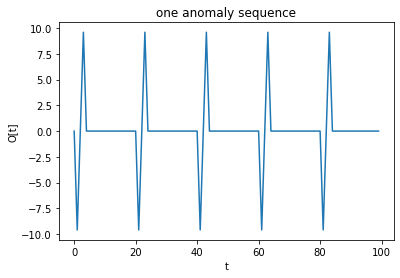

In [38]:
# special set demo
plt.plot(specTest[0 : sequenceLen])
plt.title('one anomaly sequence')
plt.xlabel('t')
plt.ylabel('O[t]')
plt.show()

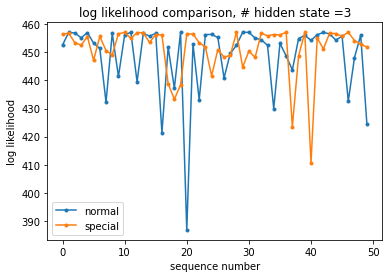

In [39]:
# hidden state # = 10

# model parameters
nComponents = 3
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the special test set
scoreSpec = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = specTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreSpec[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreSpec, ".-", label = 'special')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

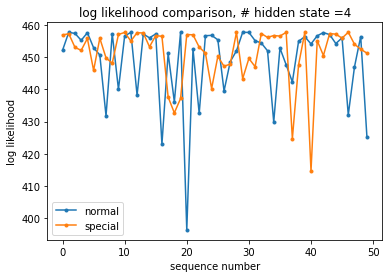

In [40]:
# hidden state # = 10

# model parameters
nComponents = 4
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full")

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the special test set
scoreSpec = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = specTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreSpec[i] = model.score(dataScore)
    
# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreSpec, ".-", label = 'special')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()

In [41]:
print('transmat')
print(model.transmat_)
print('pi')
print(model.startprob_)
print('mean')
print(model.means_)
print("covar")
print(model.covars_)

transmat
[[8.87640449e-001 1.92988813e-002 5.61797753e-002 3.68808940e-002]
 [1.00000000e+000 2.93321395e-145 0.00000000e+000 2.84746570e-145]
 [1.00000000e+000 1.18595566e-144 1.64479979e-250 1.34357079e-251]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]
pi
[1. 0. 0. 0.]
mean
[[ 0.        ]
 [ 9.91163291]
 [-9.91219655]
 [ 9.91249148]]
covar
[[[2.22222222e-06]]

 [[1.38485724e+00]]

 [[7.40189218e-01]]

 [[4.02910685e-01]]]


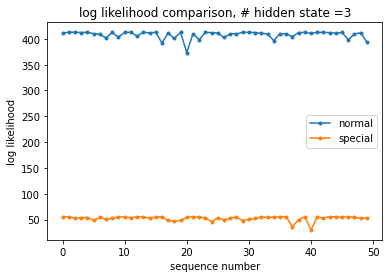

In [68]:
# model parameters
nComponents = 3

# define a left to right model
model = hmm.GaussianHMM(n_components = nComponents,
                        covariance_type = "full",
                        init_params='smcw')
transMat = np.zeros((nComponents, nComponents))
for i in range(len(transMat)):
    for j in range(len(transMat[i])):
        if j == i or j == i + 1:
            transMat[i][j] = 0.5
transMat[nComponents - 1][0] = 0.5
model.transmat_ = transMat

# train the model using only the normal dataset
dataFit = dataTrain.reshape(-1, 1)
model.fit(dataFit, dataTrainLen)

# test the model

# use the normal test set
scoreNormal = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = normalTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreNormal[i] = model.score(dataScore)

# use the special test set
scoreSpec = np.empty((nSequencesNormalTest, ))
for i in range(nSequencesNormalTest):
    dataScore = specTest[i * sequenceLen : (i + 1) * sequenceLen].reshape(-1, 1)
    scoreSpec[i] = model.score(dataScore)

# plot the testing result
plt.plot(scoreNormal, ".-", label = 'normal')
plt.plot(scoreSpec, ".-", label = 'special')
plt.legend()
plt.title('log likelihood comparison, # hidden state =' +
          str(nComponents))
plt.xlabel('sequence number')
plt.ylabel('log likelihood')
plt.show()